<img src='./figures/logo_ecole_polytechnique_IPP.png' style='position:absolute; top:0; right:0;' width='80px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Algorithms for Discrete Mathematics, year 2, semester 1</center>
<center>Lecturer: Ziad Kobeissi <a href="mailto:ziad.kobeissi@inria.fr">(send mail)</a></center>
<center>Notebook by Lucas Gérin</center>

# Symbolic computing 1: Proofs with SymPy


## Table of contents

- [Introduction to SymPy](#introduction)
- [Let SymPy do the proof](#LetSymPy)
 * [Archimedes vs SymPy](#Archimedes)
- [Solving equations](#Solving)
 * [The easy case](#Easy)
 * [Bonus: When SymPy needs help](#Help)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from pylab import *

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *



<a id="introduction"></a>
# Introduction to SymPy

Symbolic computation is a theory and a set of tools that enable manipulation of exact mathematical expressions without resorting to approximate calculations. In Python, a standard library for symbolic computation is `SymPy`. The objective of today's tutorial is to learn how to use SymPy to solve various problems typically addressed with pen and paper.

To begin with, run and compare the following scripts:

In [3]:
print('With Numpy: ')
print('root of two is '+str(np.sqrt(2)))
print('the square of (root of two) is '+str(np.sqrt(2)**2))
print('---------')
print('With SymPy: ')
print('root of two is '+str(sympy.sqrt(2)))
print('the square of (root of two) is '+str(sympy.sqrt(2)**2))


With Numpy: 
root of two is 1.4142135623730951
the square of (root of two) is 2.0000000000000004
---------
With SymPy: 
root of two is sqrt(2)
the square of (root of two) is 2


One can expand or simplify expressions:

In [4]:
print('Simplification/Expansion of algebraic expressions:')
print('the square root of 40 is '+str(sympy.sqrt(40)))
print('(root(3)+root(2))**20 is equal to '+str(expand((sympy.sqrt(3)+sympy.sqrt(2))**20)))
#
print('root(-4) ='+str(sympy.sqrt(-4)))

print('----------------')
print('Simplification of symbolic expressions:')
var('x') # We declare a 'symbolic' variable
Expression=(x**2 - 2*x + 1)/(x-1)
print(str(Expression) + ' simplifies into '+str(simplify(Expression)))


Simplification/Expansion of algebraic expressions:
the square root of 40 is 2*sqrt(10)
(root(3)+root(2))**20 is equal to 4517251249 + 1844160100*sqrt(6)
root(-4) =2*I
----------------
Simplification of symbolic expressions:
(x**2 - 2*x + 1)/(x - 1) simplifies into x - 1


<div markdown=1 class="Rmk"> When simplifying, SymPy uses formal rules and doesn't care about division by zero. As a result, you may occasionally obtain nonsensical results.

With `Sympy` one can also obtain Taylor expansions of functions with `series`:

In [5]:
# Real variable
print('--------------')
print('Taylor expansion for a real variable x')
var('x')
Expression=cos(x)
print('Expansion of cos(x) at x=0: '+str(Expression.series(x,0)))
print('Expansion of cos(x) at x=0 at the order 7: '+str(Expression.series(x,0,8)))

# integer variable
print('--------------')
print('Taylor expansion for a discrete variable n')
var('n',integer=True)
Expression=cos(1/n)
print('Expansion of cos(1/n) when n -> +oo: '+str(Expression.series(n,oo)))   # oo means infinity (!)


--------------
Taylor expansion for a real variable x
Expansion of cos(x) at x=0: 1 - x**2/2 + x**4/24 + O(x**6)
Expansion of cos(x) at x=0 at the order 7: 1 - x**2/2 + x**4/24 - x**6/720 + O(x**8)
--------------
Taylor expansion for a discrete variable n
Expansion of cos(1/n) when n -> +oo: 1/(24*n**4) - 1/(2*n**2) + 1 + O(n**(-6), (n, oo))


`SymPy` can also compute with "big O's". (By default $O(x)$ is considered for $x\to 0$.)

In [6]:
var('x')

display((x+O(x**3))*(x+x**2+O(x**3)))
print('simplifies into:')
simplify((x+O(x**3))*(x+x**2+O(x**3)))


(x + O(x**3))*(x + x**2 + O(x**3))

simplifies into:


x**2 + x**3 + O(x**4)

<div markdown=1 class="Rmk"> A nice feature of `Sympy` is that you can export formulas in $\texttt{LateX}$. You also can get nice displays with `display`.

In [7]:
var('x y')
formula=simplify((cos(x+y)-sin(x+y))**2)
print(formula)
print(latex(formula))
display(formula)


2*cos(x + y + pi/4)**2
2 \cos^{2}{\left(x + y + \frac{\pi}{4} \right)}


2*cos(x + y + pi/4)**2

**Warning:** Fractions such as $1/4$ must be introduced with `Rational(1,4)` to keep `Sympy` from evaluating the expression. For example:

In [8]:
print('(1/4)^3 = '+str((1/4)**3))
print('(1/4)^3 = '+str(Rational(1,4)**3))


(1/4)^3 = 0.015625
(1/4)^3 = 1/64


<a id="LetSymPy"></a>
# Let SymPy do the proofs

### Exercise 1.  A warm-up

<div markdown=1 class="DoIt"> <br>
Set $\phi=\frac{1+\sqrt{5}}{2}$. Use `SymPy` to simplify $F=\frac{\phi^4-\phi}{1+\phi^7}$. (Print a nice display.)

In [9]:
phi=(1+sympy.sqrt(5))/2
formula=(phi**4-phi)/(phi**7+1)
print("F = "+str(formula))
print("simplified F = ")
display(simplify(formula))

F = (-sqrt(5)/2 - 1/2 + (1/2 + sqrt(5)/2)**4)/(1 + (1/2 + sqrt(5)/2)**7)
simplified F = 


14/29 - 4*sqrt(5)/29

### Exercise 2.  A simple (?) recurrence

We will see how to use SymPy to prove a mathematical statement. Our aim is to make as rigorous proofs as possible, as long as we trust SymPy.

<div markdown=1 class="DoIt"> <br>
Let $a,b$ be two real numbers $\neq 0$, we define the sequence $(u_n)_{n\geq 0}$ as follows: $u_0=a,u_1=b$ and for $n\geq 2$
$$
u_{n}=\frac{1+u_{n-1}}{u_{n-2}}.
$$

1. Write a short program which returns the $15$ first values of $u_n$ in terms of symbolic variables $a,b$.</i>
The output should be something like:
```
u_0 = a
u_1 = b
u_2 = (b + 1)/a
...
```
2. Use `SymPy` to make and prove a conjecture for the asymptotic behaviour of the sequence $(u_n)$, for every reals $a,b$.

In [4]:
def InductionFormula(x,y):
    return (1+x)/y

var('a b')
Sequence=[a,b]

print('u_0 = a')
print('u_1 = b')
for i in range(2,15):
    Sequence.append(simplify(InductionFormula(Sequence[-1],Sequence[-2])))
    print('u_'+str(i)+' = '+str(Sequence[-1]))


u_0 = a
u_1 = b
u_2 = (b + 1)/a
u_3 = (a + b + 1)/(a*b)
u_4 = (a + 1)/b
u_5 = a
u_6 = b
u_7 = (b + 1)/a
u_8 = (a + b + 1)/(a*b)
u_9 = (a + 1)/b
u_10 = a
u_11 = b
u_12 = (b + 1)/a
u_13 = (a + b + 1)/(a*b)
u_14 = (a + 1)/b


<div markdown=1 class="Answers"> 

1. See the cell above.
2. We conjecture that for every $n\geq 0$, $u_n$ is periodic with period $5$, i.e.
\begin{align}
u_{5n}=u_0,\\
u_{5n+1}=u_1,\\
u_{5n+2}=u_2,\\
u_{5n+3}=u_3,\\
u_{5n+4}=u_4.
\end{align}
For $n=0$ this is obvious. To prove the induction, it suffices to prove that
\begin{align}
u_{5n+5}=u_{5n},\\
u_{5n+6}=u_{5n+1},\\
u_{5n+7}=u_{5n+2},\\
u_{5n+8}=u_{5n+3},\\
u_{5n+9}=u_{5n+4}.
\end{align}
And this is exactly what the SymPy computation shows as we have done the computation for **every** reals $a,b$, and since $u_k$ only depends on $u_{k-1},u_{k-2}$. So if we trust Sympy the proof is done.

<a id="Archimedes"></a>
### Exercise 3. What if Archimedes had known `Sympy`?

For $n\geq 1$, let $\mathcal{P}_n$ be a regular $3\times 2^n$-gon with radius $1$. Here is $\mathcal{P}_1$:

<img src="./figures/Archimede.jpg" alt="Roots" style="width: 350px;"/>

Archimedes (IIIrd century BC) used the fact that $\mathcal{P}_n$ gets closer and closer to the unit circle to obtain good approximations of $\pi$.<br>
We will use SymPy to deduce nice formulas for approximations of $\pi$.

<div markdown=1 class="DoIt">
Let $L_n$ be the length of any side of $\mathcal{P}_n$. Compute $L_1$ and use the following picture to write $L_{n+1}$ as a function of $L_n$:

* $O$ is the center of the circle, $OC=1$.
* $(OB)$ is the bisector of $\widehat{DOC}$.
* $\widehat{OAC}$ is a right angle.

<img src="./figures/SchemaArchimede.jpg" alt="Roots" style="width: 350px;"/>

<div markdown=1 class="Answers"> As $OB$ is the bisector we have that $CB=BD$, which both are sides of $\mathcal{P}_{n+1}$.<br>
Besides, $OAC$ is rectangle at $A$. By Pythagora's theorem
$$
1^2=OA^2+AC^2=OA^2+(L_n/2)^2.
$$
$BAC$ is also rectangle at $A$, therefore
\begin{align*}
L_{n+1}^2=BC^2&=AB^2+AC^2\\
&=(1-OA)^2+(L_n/2)^2\\
&=\bigg(1-\sqrt{1-(L_n/2)^2}\bigg)^2+(L_n/2)^2\\
&=1+1-(L_n/2)^2-2\sqrt{1-(L_n/2)^2}+(L_n/2)^2\\
&=2-2\sqrt{1-(L_n/2)^2}.
\end{align*}
Finally we obtain
\begin{align*}
L_{n+1}=\sqrt{2-2\sqrt{1-(L_n/2)^2}}.
\end{align*}

<div markdown=1 class="DoIt">
1. Write a script which computes exact expressions for the first values $L_1,L_2,\dots, L_n$. (First try for small $n$'s.)

2. Find a sequence $a_n$ such that $a_nL_n$ converges to $\pi$ (here we don't ask for a proof, this is quite complicated to prove rigorously). Deduce some good algebraic approximations of $\pi$. Export your results in $\texttt{Latex}$ in order to get nice formulas.

<i>(In order to check your formulas, you may compute numerical evaluations. With `SymPy`, a numerical evaluation is obtained with `N(expression)`.)</i>

In [12]:
SuccessiveApproximations=[1]
p=11
for n in range(2,p):
    OldValue=SuccessiveApproximations[-1]
    NewValue=sqrt(2-2*sqrt(1-(OldValue**2)*Rational(1,4)))
    SuccessiveApproximations.append(NewValue)
    print('---------------------')
    #display(NewValue)
    print('For n = ',str(n),', i.e. '+str(3*2**n)+' sides, we get 3x2^n L_n =')
    display(simplify(3*(2**(n-1))*NewValue))
    print(latex(simplify(3*(2**(n-1))*NewValue)))
    print('Numerical value: ',N(NewValue*3*2**(n-1)))


---------------------
For n =  2 , i.e. 12 sides, we get 3x2^n L_n =


6*sqrt(2 - sqrt(3))

6 \sqrt{2 - \sqrt{3}}
Numerical value:  3.10582854123025
---------------------
For n =  3 , i.e. 24 sides, we get 3x2^n L_n =


12*sqrt(2 - sqrt(sqrt(3) + 2))

12 \sqrt{2 - \sqrt{\sqrt{3} + 2}}
Numerical value:  3.13262861328124
---------------------
For n =  4 , i.e. 48 sides, we get 3x2^n L_n =


24*sqrt(2 - sqrt(sqrt(sqrt(3) + 2) + 2))

24 \sqrt{2 - \sqrt{\sqrt{\sqrt{3} + 2} + 2}}
Numerical value:  3.13935020304687
---------------------
For n =  5 , i.e. 96 sides, we get 3x2^n L_n =


48*sqrt(2 - sqrt(sqrt(sqrt(sqrt(3) + 2) + 2) + 2))

48 \sqrt{2 - \sqrt{\sqrt{\sqrt{\sqrt{3} + 2} + 2} + 2}}
Numerical value:  3.14103195089051
---------------------
For n =  6 , i.e. 192 sides, we get 3x2^n L_n =


96*sqrt(2 - sqrt(sqrt(sqrt(sqrt(sqrt(3) + 2) + 2) + 2) + 2))

96 \sqrt{2 - \sqrt{\sqrt{\sqrt{\sqrt{\sqrt{3} + 2} + 2} + 2} + 2}}
Numerical value:  3.14145247228546
---------------------
For n =  7 , i.e. 384 sides, we get 3x2^n L_n =


192*sqrt(2 - sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(3) + 2) + 2) + 2) + 2) + 2))

192 \sqrt{2 - \sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{3} + 2} + 2} + 2} + 2} + 2}}
Numerical value:  3.14155760791186
---------------------
For n =  8 , i.e. 768 sides, we get 3x2^n L_n =


384*sqrt(2 - sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(3) + 2) + 2) + 2) + 2) + 2) + 2))

384 \sqrt{2 - \sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{3} + 2} + 2} + 2} + 2} + 2} + 2}}
Numerical value:  3.14158389214832
---------------------
For n =  9 , i.e. 1536 sides, we get 3x2^n L_n =


768*sqrt(2 - sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(3) + 2) + 2) + 2) + 2) + 2) + 2) + 2))

768 \sqrt{2 - \sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{3} + 2} + 2} + 2} + 2} + 2} + 2} + 2}}
Numerical value:  3.14159046322805
---------------------
For n =  10 , i.e. 3072 sides, we get 3x2^n L_n =


1536*sqrt(2 - sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(3) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2))

1536 \sqrt{2 - \sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{3} + 2} + 2} + 2} + 2} + 2} + 2} + 2} + 2}}
Numerical value:  3.14159210599927


<div markdown=1 class="Answers"> 
When $n$ goes large, $\mathcal{P}_n$ gets closer and closer to the unit circle. As the perimeter of $\mathcal{P}_n$ is $3\times 2^n L_n$, we expect that
$$
3\times 2^n L_n \to 2\pi,
$$
therefore we choose $a_n=3\times 2^{n-1}$. 
For $n=8$ we obtain:
<font size="-1">
$$
\pi \approx 384 \sqrt{- \sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{\sqrt{3} + 2} + 2} + 2} + 2} + 2} + 2} + 2}
= 3.141583892...
$$
</font>


<div markdown=1 class="DoIt">
Can you deduce a proof that $\pi >3$ ?

<div markdown=1 class="Answers"> 
The length of a chord is always smaller than he corresponding arc. Then for every $n$
$$
2\pi\geq 3\times 2^n L_n.
$$
For $n=2$ we obtain
$$
\pi \geq 3.10582854123...
$$
</font>


<a id="Solving"></a>
# Solving equations with SymPy

One can solve equations with Sympy. The following script shows how to solve $x^2=x+1$:

In [13]:
var('x') # we declare the variable
SetOfSolutions=solve(x**2-x-1,x)
print(SetOfSolutions)


[1/2 - sqrt(5)/2, 1/2 + sqrt(5)/2]


<a id="Easy"></a>
### Exercise 4.  Solving equations with Sympy: the easy case

Let $n\geq 1$ be an integer, we are interested in solving the equation
\begin{equation}
x^3 +nx =1.\tag{$\star$}
\end{equation}

In the script below we plot $x \mapsto x^3$, and $x \mapsto 1-nx$ for $0\leq x\leq 1$ and for several (large) values of $n$. This suggests that Equation $(\star)$ has a unique real solution in the interval $[0,1]$, that we will denote by $S_n$.

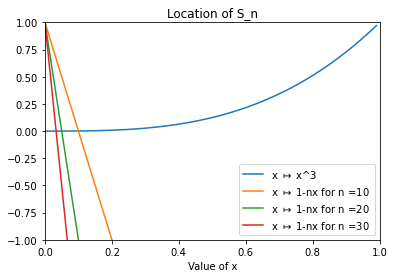

In [14]:
RangeOf_x=np.arange(0,1,0.01)

plt.plot(RangeOf_x,RangeOf_x**3,label='x $\mapsto$ x^3')

for n in [10, 20, 30]:
    f=[1-n*x for x in RangeOf_x]
    plt.plot(RangeOf_x,f,label='x $\mapsto$ 1-nx for n ='+str(n)+' ')

plt.xlim(0, 1),plt.ylim(-1, 1)
plt.xlabel('Value of x')
plt.legend()
plt.title('Location of S_n')
plt.show()


<div markdown=1 class="DoIt"> **(Theory)**

1. Prove that indeed for every $n\geq 1$, Equation $(\star)$ has a unique real solution in the interval $[0,1]$. 
2. According to the plot, what can we conjecture for the limit $S_n$?

<div markdown=1 class="Answers"> 
1. The map $x\mapsto f(x)=x^3+nx -1$ is continuous and increasing on $[0,1]$, since
$$
f'(x)=3x^2 +n > n>0.
$$
Besides,
$$
f(0)=0^3-n\times 0-1=-1,\qquad f(1)=1^3+n\times 1-1=n>0.
$$
This implies that there is a unique $S_n \in(0,1)$ such that
$f(S_n)=0$, <i>i.e.</i>
$$
(S_n)^3 +nS_n =1.
$$
2. On the figure above we observe that when $n\to +\infty$, the solution of Equation $(\star)$ seems to get closer and closer to zero.<br>
We therefore conjecture 
$$
\lim_{n\to+\infty} S_n=0.
$$

<div markdown=1 class="DoIt"> <br>

1. Use the function `solve()` to compute the exact expression of $S_n$.
2. Use `SymPy` and the function `series`to get the asymptotic expansion of  $S_n$ (up to $\mathcal{O}(1/n^5)$). Check your previous conjecture.

In [13]:
var('x')
var('n')#,integer=True)

# Question 1.
Solutions=solve(x**3+n*x-1,x)
Sn=Solutions[0]  # The two other solutions are complex numbers
display(Sn)
# Question 2.
Taylor=series(Sn,n,oo,5)
print("Taylor expansion when n -> infinity : "+str(Taylor))


-n/(3*(sqrt(n**3/27 + 1/4) + 1/2)**(1/3)) + (sqrt(n**3/27 + 1/4) + 1/2)**(1/3)

Taylor expansion when n -> infinity : -1/n**4 + 1/n + O(n**(-5), (n, oo))


<div markdown=1 class="Answers"> 
1. According to the above script,
$$
\frac{- 2 \sqrt[3]{18} n + \sqrt[3]{12} \left(\sqrt{3} \sqrt{4 n^{3} + 27} + 9\right)^{\frac{2}{3}}}{6 \sqrt[3]{\sqrt{3} \sqrt{4 n^{3} + 27} + 9}}.
$$
2. SymPy gives
$$
S_n=\frac{1}{n}-\frac{1}{n^4}+\mathcal{O}(1/n^5).
$$
Indeed, this goes to zero as expected.

<a id="Help"></a>
###  Exercise 5. Solving equations: when SymPy needs help
 
We consider the following equation:
\begin{equation}
X^5-3\varepsilon X^4-1=0, \tag{$\star$}
\end{equation}
where $\varepsilon$ is a positive parameter. As in previous exercise a quick analysis shows that if $\varepsilon>0$ is small enough then ($\star$) has a unique real solution, that we denote by $S_\varepsilon$.

The degree of this equation is too high to be solved by `SymPy`:

In [5]:

var('x')
var('e')
solve(x**5-3*e*x**4-1,x)



[]

Indeed, `SymPy` needs help to handle this equation.

In the above script we plotted the function $f(x)=x^5-3\varepsilon x^4-1$ for some small $\varepsilon$. 
This suggests that $\lim_{\varepsilon \to 0}S_\varepsilon=1$.

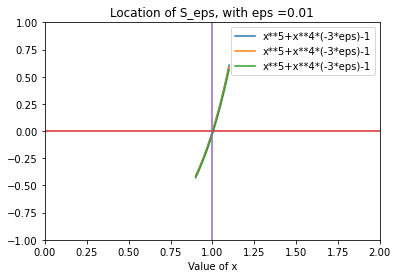

In [7]:
RangeOf_x=np.arange(0,2,0.01)

def ToBeZero(x,eps):
    return x**5+x**4*(-3*eps) -1

eps=0.001
plt.plot(RangeOf_x,[ToBeZero(x,eps) for x in RangeOf_x],label='x**5+x**4*(-3*eps)-1')

plt.xlim(0, 2)
plt.ylim(-1, 1)
plt.plot([-2,2],[0,0])
plt.plot([1,1],[-2,2])
plt.xlabel('Value of x')
plt.title('Location of S_eps, with eps ='+str(eps))
plt.legend()
plt.show()


<div markdown=1 class="DoIt"><br>
We admit that $S_\varepsilon$ can be written as 
\begin{equation}
S_\varepsilon = 1+ r\varepsilon + s\varepsilon^2+ \mathcal{O}(\varepsilon^3),
\end{equation}
for some real $r,s$. Use `SymPy` to find $r,s$.<br>
<i>(You can use any `SymPy` function already seen in this notebook.)<i>

In [23]:
var('r')
var('s')
var('eps')
Expression=ToBeZero(1+r*eps+s*eps**2+O(eps**3),eps)

Simple=simplify(Expression)
print(Simple)

solve([-3+5*r,5*s-12*r+10*r**2],[r,s])


-3*eps + 5*eps*r + 5*eps**2*s - 12*eps**2*r + 10*eps**2*r**2 + O(eps**3)


[(3/5, 18/25)]

<div markdown=1 class="Answers"> If we plug $ 1+ r\varepsilon + s\varepsilon^2+ \mathcal{O}(\varepsilon^3)$ into equation ($\star$) we obtain (with the script):
\begin{equation}
0=-3\varepsilon + 5r\varepsilon + 5s\varepsilon^2 - 12r\varepsilon^2 + 10r^2\varepsilon^2 + \mathcal{O}(\varepsilon^3).
\tag{$\mathcal{E}_1$}
\end{equation}
If we divide both sides of equation ($\mathcal{E}_1$) by $\varepsilon$ we obtain
$$ 
0=-3 + 5r + 5s\varepsilon - 12r\varepsilon + 10r^2\varepsilon + \mathcal{O}(\varepsilon^2). \tag{$\mathcal{E}_2$}
$$
Letting now $\varepsilon \to 0$ yields $-3+5r=0$, i.e. $r=3/5$.

If we plug this into ($\mathcal{E}_2$) and divide once more by $\varepsilon$ we obtain
$$
0=5s - 12r + 10r^2 + \mathcal{O}(\varepsilon),
$$
which gives $5s-12r+10r^2=0$, i.e. $s=18/25$.
<br><br>
Finally,
$$
S_\varepsilon=1+\tfrac{3}{5}\varepsilon + \tfrac{18}{25}\varepsilon^2 + \mathcal{O}(\varepsilon^2),
$$
